# Case Study # 1:Case Study: How Does a Bike-Share Navigate Speedy Success?

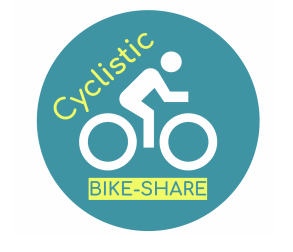

# About the company: Cyclist
A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.

## Business Goal
Design marketing strategies aimed at converting casual riders into annual members.

## Deliverables

1. A clear statement of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top three recommendations based on your analysis

# Step - 1: Ask
Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

## Business Task
Understand how casual riders and annual members use Cyclistic bikes differently to maximize the number of annual memberships.

## Stakeholders
`Lily Moreno`: The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.
`Cyclistic marketing analytics team`: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic achieve them.
`Cyclistic executive team`: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

# Step - 2: Prepare

## About Dataset
This is public data consists of customer types using Cyclistic bikes.This is 12 months data. The data has been made available by Motivate International Inc. under this license.

## ROCCC analysis

### Reliable: 
This data is from a fictional company. This is only 12 months data which is not sufficient.
### Original: 
It is third party data so not original.
### Comprehensive:
It has sufficient features to answer the business questions.
### Current: 
This is current data from 2021 which is acceptable.
### Cited:
Its citations are also unkown. 


In [74]:
# Import Libraries
import pandas as pd

In [75]:
# Read 12 months cyclist data from October 2020 to Spetember 2021 
cyclist_1 = pd.read_csv('../input/divvytripdata/202010-divvy-tripdata/202010-divvy-tripdata.csv')
cyclist_2 = pd.read_csv('../input/divvytripdata/202011-divvy-tripdata/202011-divvy-tripdata.csv')
cyclist_3 = pd.read_csv('../input/divvytripdata/202012-divvy-tripdata/202012-divvy-tripdata.csv')
cyclist_4 = pd.read_csv('../input/divvytripdata/202101-divvy-tripdata/202101-divvy-tripdata.csv')
cyclist_5 = pd.read_csv('../input/divvytripdata/202102-divvy-tripdata/202102-divvy-tripdata.csv')
cyclist_6 = pd.read_csv('../input/divvytripdata/202103-divvy-tripdata/202103-divvy-tripdata.csv')
cyclist_7 = pd.read_csv('../input/divvytripdata/202104-divvy-tripdata/202104-divvy-tripdata.csv')
cyclist_8 = pd.read_csv('../input/divvytripdata/202105-divvy-tripdata/202105-divvy-tripdata.csv')
cyclist_9 = pd.read_csv('../input/divvytripdata/202106-divvy-tripdata/202106-divvy-tripdata.csv')
cyclist_10 = pd.read_csv('../input/divvytripdata/202107-divvy-tripdata/202107-divvy-tripdata.csv')
cyclist_11 = pd.read_csv('../input/divvytripdata/202108-divvy-tripdata/202108-divvy-tripdata.csv')
cyclist_12 = pd.read_csv('../input/divvytripdata/202109-divvy-tripdata/202109-divvy-tripdata.csv')


In [76]:
# Combine/Cancatenate the dataframes
new_df = [cyclist_1, cyclist_2 ,cyclist_3, cyclist_4, cyclist_5 ,cyclist_6, cyclist_7, cyclist_8 ,cyclist_9, cyclist_10, cyclist_11 ,cyclist_12]
cyclist = pd.concat(new_df)

In [77]:
cyclist.head(10)

In [78]:
cyclist.shape

# Step - 3: Process

Python will be used as a programming tool


In [79]:
# Check basic information of data
cyclist.info()

The variable `started_at` and `ended_at` are saved as object. We need to transform those into datetime format.

## Data Cleaning

In [80]:
# Check Null Values 
cyclist.isnull().sum()

There are lots of null values for `start_station_name`, `start_station_id`, `end_station_name`, `end_station_id`, `end_lat`, `end_lng`

In [81]:
# drop columns with too many null values
cyclist =  cyclist.drop(columns = ['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'end_lat', 'end_lng'])

In [82]:
# Check duplicate rows
cyclist.duplicated().value_counts()


There are *'NO'* duplicate entries in the data.

In [83]:
# Convert "started_at" and "ended_at" to datatime type and format to yyyy-mm-dd hh:mm:ss
cyclist["started_at"] = pd.to_datetime(cyclist["started_at"], format="%Y/%m/%d %H:%M:%S")
cyclist["ended_at"] = pd.to_datetime(cyclist["ended_at"], format="%Y/%m/%d %H:%M:%S")

In [84]:
# Confirm the execution
cyclist.info()

In [85]:
# Separating time and date into two different columns
cyclist['Date_started'] = pd.to_datetime(cyclist['started_at']).dt.date
cyclist['Time_started'] = pd.to_datetime(cyclist['started_at']).dt.time
cyclist['Date_ended'] = pd.to_datetime(cyclist['ended_at']).dt.date
cyclist['Time_ended'] = pd.to_datetime(cyclist['ended_at']).dt.time

In [86]:
# Finding the durtaion of rides in minutes
cyclist['ride_duration'] = cyclist["ended_at"] - cyclist["started_at"] 
cyclist['ride_duration'] = cyclist['ride_duration'].dt.total_seconds()
cyclist['ride_duration'] = cyclist['ride_duration']//60
cyclist=cyclist.query('ride_duration > 0') 
cyclist['ride_duration']

In [87]:
# Extract month of ride into new column
cyclist['start_month']=cyclist['started_at'].dt.month

In [88]:
# Extract hour of ride into new column
cyclist['start_hour']=cyclist['started_at'].dt.hour

In [89]:
# Extract Day of the ride
cyclist["DayOfTheWeek_Started"] = cyclist['started_at'].dt.day_name()
print(cyclist["DayOfTheWeek_Started"])

In [90]:
# Extract whether ride is on Weekend or no weekend into new column
cyclist['weekend'] = (cyclist['started_at'].dt.weekday) >= 5

In [91]:
# Print the weekend column
print (cyclist['weekend'])

# Step- 4 Data Analyze

In [92]:
# summary statistics
cyclist.describe()

# Step - 5 Share

In [93]:
# Plot the pattern of casual and members on weekend and normal days
print(cyclist.groupby(['member_casual','weekend'])['weekend'].count().unstack(0).plot.bar())


It is observed that members prefer weekdays where as casual riders prefer weekends

In [94]:
# Average duration of rides for casual and members on weekends and week days
print(cyclist.groupby(['member_casual','weekend'])['ride_duration'].mean().unstack(0).plot.bar())

In [95]:
# Average duration of rides for casual and members 
print(cyclist.groupby(['member_casual'])['ride_duration'].mean().plot.bar())

In [96]:
cyclist=cyclist.query('ride_duration > 0') 
T = cyclist.groupby(['member_casual','DayOfTheWeek_Started'])['ride_duration'].mean().reset_index()
#T=data.groupby(['start_dayofweek','member_casual']).mean().reset_index()[['start_dayofweek','member_casual','ride_duration']]
plt.figure(figsize=(17,6))
sns.barplot(data=T,x='DayOfTheWeek_Started',y='ride_duration',hue='member_casual',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.ylabel('Mean ride duration in minutes')
plt.title('Mean ride duration per day for each customer type');


It is observed that sasual riders ride for longer period of time as compared to member riders on weekdays as well as weekends

In [97]:
# Number of rides each day
T = cyclist.groupby(['member_casual','DayOfTheWeek_Started']).count().reset_index()
#T=data.groupby(['start_dayofweek','member_casual']).mean().reset_index()[['start_dayofweek','member_casual','ride_duration']]
plt.figure(figsize=(17,6))
sns.barplot(data=T,x='DayOfTheWeek_Started',y='ride_duration',hue='member_casual',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.ylabel('Mean ride duration in minutes')
plt.title('Mean ride duration per day for each customer type');


It is observed that casual riders prefer weekends

In [99]:
# Duration percentage and number of ride percentage for member and casual riders
#Python3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

individual = cyclist.groupby(['member_casual'])['ride_duration'].sum()//60
individual.plot.pie(autopct="%.1f%%");
#total = print(cyclist['duration'].sum()/60)



It is observed that casual riders rides 66.8% of the total duration


In [100]:
# Bikes prefered for member or casual
cyclist.groupby(['member_casual','rideable_type'])['rideable_type'].count().unstack(0).plot.bar()

It is observed that classic bike is the most prefered type and docked bike is least prefered.

In [105]:
# Mean ride duration during each month 
T=cyclist.groupby(['start_month','member_casual']).mean().reset_index()[['start_month','member_casual','ride_duration']]
plt.figure(figsize=(16,6))
sns.barplot(data=T,x='start_month',y='ride_duration',hue='member_casual')
plt.xlabel('Month')
plt.ylabel('Mean ride duration in minutes')
plt.title('Mean ride duration each month for each customer type');
#plt.legend(['Casual customer','Member'])

# ACT

According to findings following recommendations are made:
           
            
1. Company can convert casual riders into members by giving discounts on weekends since casual riders prefer to ride on weekends
2. Casual riders ride for longer duration hence company should consider flexible charges for long duration riders who become mebers
3. Member riders are consistent through year in every month. However, casual riders prefer summer season. Hence, company should consider better marketing and flexibke charges during summer to convert casual members into memers.
4. Marketing campaign may be initialized to promote the benefits of member riders during summer, weekends and for long duration rides.